In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl

import math

In [2]:
# original notebook
# https://naf-jhub.desy.de/user/axelheim/notebooks/private/MC_studies/Dstlnu_Bt_generic/load_NN_to_basf2/productive_method/relatedAnalysis/analysis_onlineAppliedNAHS_NN.ipynb

In [3]:
nfs_path = "/nfs/dust/belle2/user/axelheim/thesisPlots_data/"


In [4]:
#df_Ups4S.to_csv(nfs_path +  "df_Ups4S_BCS.csv")
df_Ups4S = pd.read_csv(nfs_path +  "df_Ups4S_BCS.csv")

KeyboardInterrupt: 

197986
197986
197986


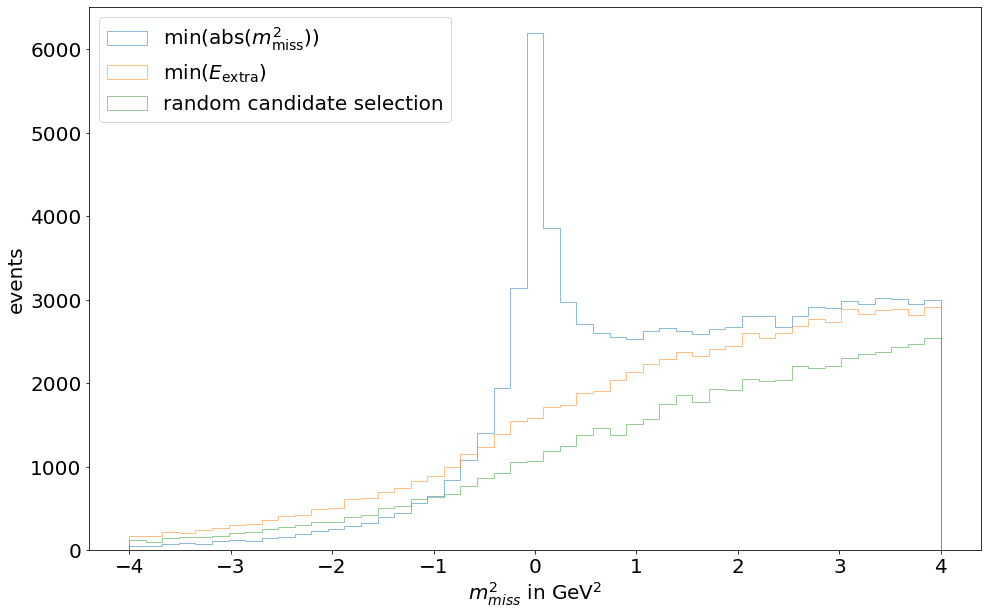

In [13]:
df_Ups4S["abs_m2RecoilSignalSide"] = df_Ups4S["m2RecoilSignalSide"].abs() 

lep_truth = "off"
font_size=20


labelDict = {
    "abs_m2RecoilSignalSide" : r'$\mathrm{min}(\mathrm{abs}(m_{\mathrm{miss}}^2))$',
    "roeE_ofUps4S" : r'$\mathrm{min}(E_{\mathrm{extra}})$',
    "random_BCS" : 'random candidate selection'
}


fig, ax = plt.subplots()
#fig.suptitle('BCS')

for var in ["abs_m2RecoilSignalSide","roeE_ofUps4S","random_BCS"]:

    if var == "random_BCS":
        # this takes a sample of all events which results in shuffling the evts
        tmp = df_Ups4S.sample(frac=1)
        # now keeping the first results in random BCS
        tmp = tmp.drop_duplicates(subset=("__event__"), keep='first')
    else:
        tmp = df_Ups4S.sort_values(var,ascending=True).drop_duplicates(subset=("__event__"), keep='first')



    print(tmp.shape[0])
    bins = np.linspace(-4, 4, 50)

    fig.set_size_inches(16, 10)

    ax.set_xlabel(r'$m_{miss}^2$ in GeV$^2$',fontsize=font_size)
    ax.set_ylabel("events",fontsize=font_size)

    if lep_truth == "off":
        ax.hist(tmp.m2RecoilSignalSide, bins, alpha=0.5, label=labelDict[var] ,histtype='step')
    elif lep_truth == "on":    
        ax.hist(tmp[tmp["lep_MC_truth"] == 1].m2RecoilSignalSide, bins, alpha=0.5, label=var + " lep truth matching == 1" ,histtype='step')

    ax.legend(loc='upper left',fontsize=font_size)
    

    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.tick_params(axis='both', which='minor', labelsize=font_size)



plt.savefig(f'plots/ONLINE_APP_FIXED_onlineNN_m2Recoil_BCS_lepTruthCut_off.pdf')

In [5]:
BCS_df = pd.read_csv(nfs_path +  "BCS_df_mm2.csv")

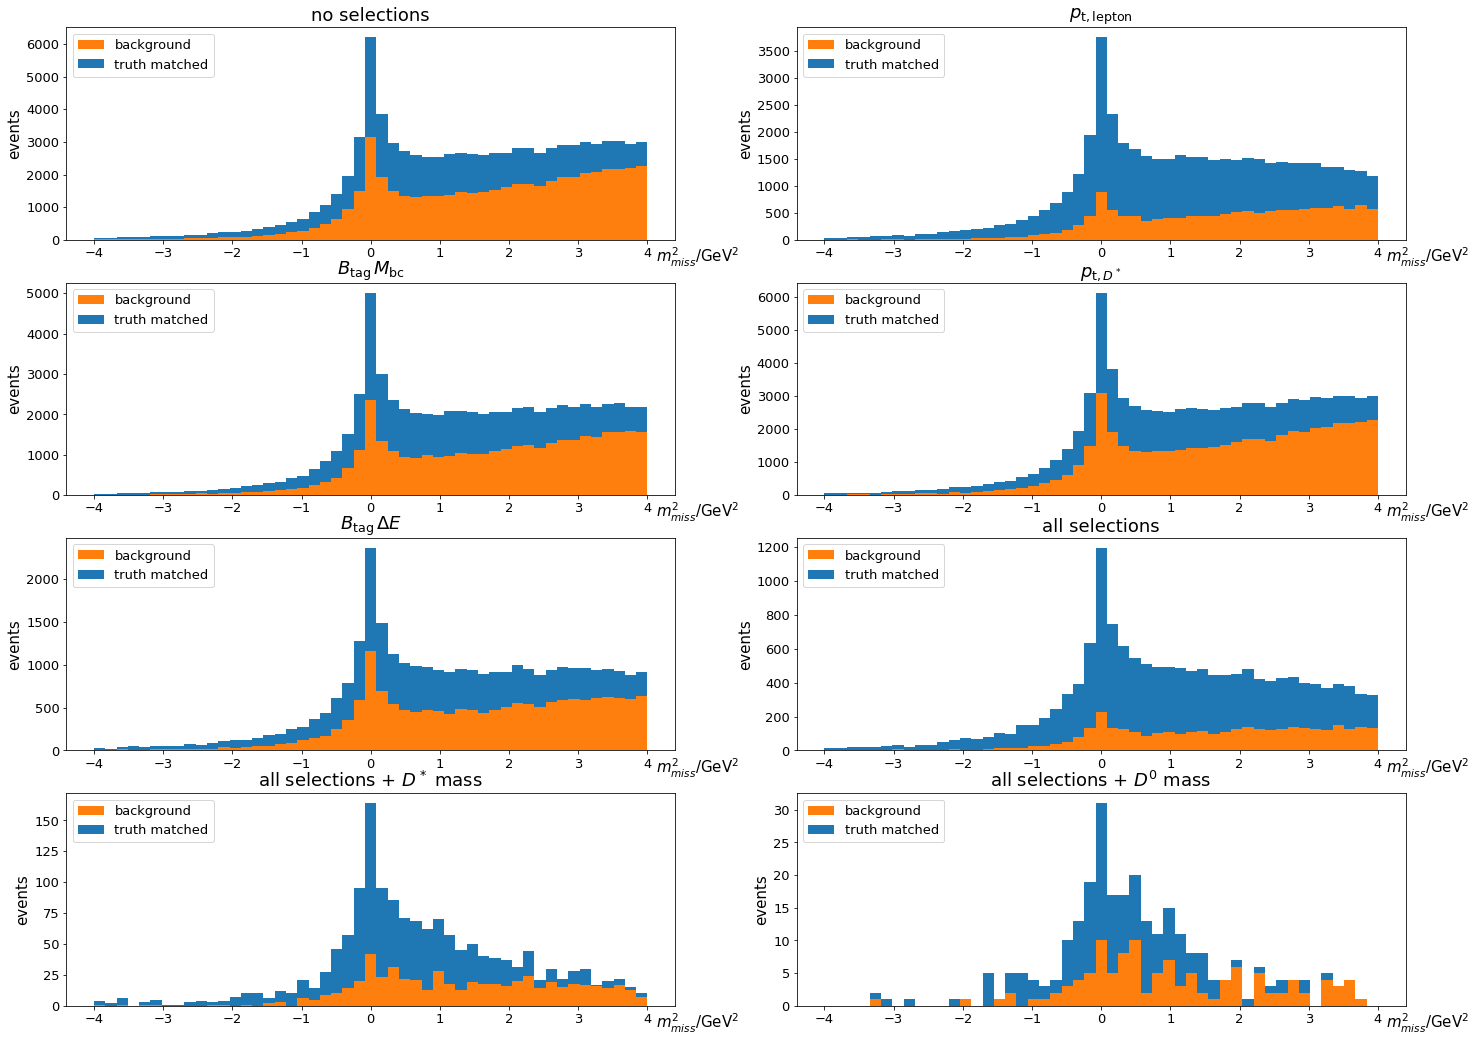

In [8]:
dim_x = 4
fig, axs = plt.subplots(dim_x, 2)
fig.set_size_inches(24, 18)
font_size=8
plt.rcParams.update({'font.size': font_size})



# this is in wrong order on purpose!
mcTruth_df = BCS_df[BCS_df["lep_MC_truth"] == 0]
mcBG_df = BCS_df[BCS_df["lep_MC_truth"] == 1]

font_size=15
font_size_title=18
deltaE_cut=0.5

bins = np.linspace(-4, 4, 50)

labels = ["no selections",r'$B_{\mathrm{tag}} \, M_{\mathrm{bc}}$',r'$B_{\mathrm{tag}} \, \Delta E$',
          r'$\mathit{foxWolframR2}$', r'$p_{\mathrm{t}, D^*}$' , r'$p_{\mathrm{t, lepton}}$',
         r'$D^0$ mass ', r'$D^*$ mass', r'hadronic $B_{\mathrm{tag}}$']





ax = axs[0,0]  
ax.set_title(labels[0], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([mcTruth_df["m2RecoilSignalSide"],mcBG_df["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)

ax = axs[1,0]  
ax.set_title(labels[1], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([mcTruth_df[mcTruth_df.dau0_Mbc > 5.00]["m2RecoilSignalSide"],
         mcBG_df[mcBG_df.dau0_Mbc > 5.00]["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)

ax = axs[2,0]  
ax.set_title(labels[2], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([mcTruth_df[(mcTruth_df.dau0_deltaE > (-1.5-deltaE_cut)) & 
            (mcTruth_df.dau0_deltaE < (-1.5+deltaE_cut))]["m2RecoilSignalSide"],
         mcBG_df[(mcBG_df.dau0_deltaE > (-1.5-deltaE_cut)) & 
            (mcBG_df.dau0_deltaE < (-1.5+deltaE_cut))]["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)

ax = axs[0,1]  
ax.set_title(labels[5], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([mcTruth_df[(mcTruth_df.lep_pt > 0.7)]["m2RecoilSignalSide"],
         mcBG_df[(mcBG_df.lep_pt > 0.7)]["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)


ax = axs[1,1]  
ax.set_title(labels[4], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([mcTruth_df[(mcTruth_df.Dst_pt < 2.4)]["m2RecoilSignalSide"],
         mcBG_df[(mcBG_df.Dst_pt < 2.4)]["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)


allCuts_mcTruth_df = mcTruth_df[(mcTruth_df.lep_pt > 0.7) & (mcTruth_df.dau0_deltaE > (-1.5-deltaE_cut)) &
                    (mcTruth_df.dau0_deltaE < (-1.5+deltaE_cut)) &
                    (mcTruth_df.dau0_Mbc > 5.00) & (mcTruth_df.Dst_pt < 2.4)]

allCuts_mcBG_df = mcBG_df[(mcBG_df.lep_pt > 0.7) & (mcBG_df.dau0_deltaE > (-1.5-deltaE_cut)) &
                    (mcBG_df.dau0_deltaE < (-1.5+deltaE_cut)) &
                    (mcBG_df.dau0_Mbc > 5.00) & (mcBG_df.Dst_pt < 2.4)]

ax = axs[2,1]  
ax.set_title("all selections", loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([allCuts_mcTruth_df["m2RecoilSignalSide"],
         allCuts_mcBG_df["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)


ax = axs[3,1]  
ax.set_title("all selections + "+ labels[6], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([allCuts_mcTruth_df[(allCuts_mcTruth_df.D_M < 1.95) & (allCuts_mcTruth_df.D_M > 1.8)]["m2RecoilSignalSide"],
         allCuts_mcBG_df[(allCuts_mcBG_df.D_M < 1.95) & (allCuts_mcBG_df.D_M > 1.8)]["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)


ax = axs[3,0]  
ax.set_title("all selections + "+ labels[7], loc="center", fontdict = {'fontsize': font_size_title})
ax.hist([allCuts_mcTruth_df[(allCuts_mcTruth_df.Dst_M < 2.2) & (allCuts_mcTruth_df.Dst_M > 1.8)]["m2RecoilSignalSide"],
         allCuts_mcBG_df[(allCuts_mcBG_df.Dst_M < 2.2) & (allCuts_mcBG_df.Dst_M > 1.8)]["m2RecoilSignalSide"]], bins, 
        label=["background","truth matched"],color=['#ff7f0e','#1f77b4'] , stacked=True, density=False, alpha=1)




#ax.hist([mcTruth_df["Ds_massDifference"],mcBG_df["Ds_massDifference"]], bins, stacked=True, density=False, alpha=1,
#       label=["truth matched","background"])


for i in range(dim_x*2):
    minfac=2
    idx=i % dim_x
    idy=math.floor(i/dim_x)
    ax = axs[idx,idy]
    ax.set_xlabel(r'$m_{miss}^2$/GeV$^2$',loc='right', fontdict = {'fontsize': font_size})
    ax.set_ylabel("events", fontdict = {'fontsize': font_size})
    ax.legend(loc='upper left', fontsize=font_size-minfac)
    
    #label = axs[axs_index0,axs_index1].set_xlabel(r'$p$ / MeV', fontsize = fontsize)
    #axs[axs_index0,axs_index1].set_ylabel(r'particles', fontsize = fontsize)
    ax.xaxis.set_label_coords(1.105, -0.0275)
    
    
    
    ax.tick_params(axis='both', which='major', labelsize=font_size-minfac)
    ax.tick_params(axis='both', which='minor', labelsize=font_size-minfac)

plt.savefig('plots/m2recoilFilter_MCtruth_bg_stacked.pdf')